# Complex Networks 1st Project
## Imports and network genaration

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np


# Read the graph
G = nx.read_graphml('airlines.graphml')



# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.clustering.html
# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html



## Average Path Length

What's the average shortest path from node A to node B?

In [18]:
print("Average Path Length: ", nx.average_shortest_path_length(G))

Average Path Length:  2.3180578286961264


## Clustering

In [19]:
# Clustering stuff ?? Maybe it won't work because of that multigraph shit
# Average times that airports B<->C given that A<->C and A<->B
# Can't do this since this a a multigraph (more than one edge can exist from A to B)
# print("Average Clustering: ", nx.triangles(G))

## Centrality

### Betweeness centrality
Here we will be plotting the top 10 airports with the biggest betweenness centrality.
This is a measure of how much a appears more times in the shortest paths between two other nodes.

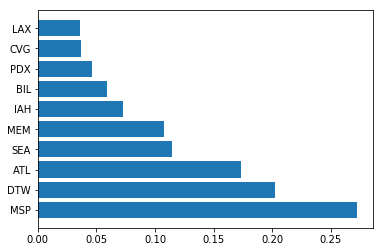

In [20]:
import operator

# Get the betweenness centrality of all the nodes
betweennessDic = nx.betweenness_centrality(G)
# Get the sorted betweenness centrality
sorted_betweenness = sorted(betweennessDic.items(), key=operator.itemgetter(1), reverse=True)
# Only the best 10 will be considered
sorted_betweenness = list(sorted_betweenness[0:10])
# Get two lists, one with the airport codes and one with the corresponding betweenness centrality measure
airport_number, betweenness = zip(*sorted_betweenness)

node_attributes = nx.get_node_attributes(G,'tooltip')

# Array with airport code
airport_codes = []

for i in range(len(airport_number)):
    airport_codes.append(node_attributes[airport_number[i]][0:3])
    

plt.figure()
plt.barh(range(len(betweenness)),betweenness)
plt.yticks(range(len(airport_codes)),airport_codes)

plt.show()

### Closeness centrality
Here we will be Plotting the top 10 airports with the biggest closeness centrality.
Gives us how close each airport is to the others. Can compute the airport closest to every other in the USA.

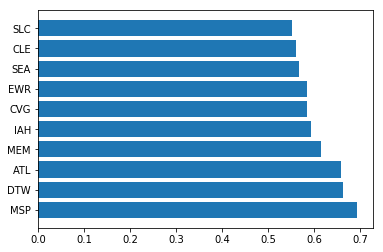

In [21]:
import operator

closeness = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness.items(), key=operator.itemgetter(1), reverse=True)

node_info = nx.get_node_attributes(G, 'tooltip')
nodes = []
for t in sorted_closeness[0:10]:
    nodes += [node_info[t[0]][0:3]]

closeness_values = []
for t in sorted_closeness[0:10]:
    closeness_values += [t[1]]

plt.figure()

plt.barh(range(len(nodes)),closeness_values)
plt.yticks(range(len(nodes)),nodes)

plt.show()

## Degree Study

### Average degree
The average degree accounting for all the nodes in the network

In [22]:
# Get list with degrees of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Get the average degree
average_degree = sum(degree_sequence)/len(degree_sequence)

print("Average degree: ", average_degree)

Average degree:  17.880851063829788


### Average Degree Connectivity
How popular are the airports that connect to the popular/unpopular airports

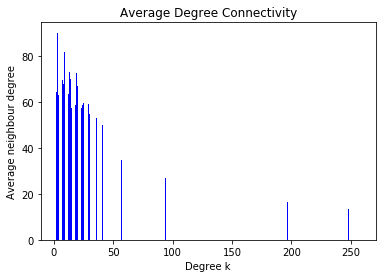

In [23]:
import operator

# Get the average degree connectivity dic
average_degree_conn = nx.average_degree_connectivity(G)

# sort it in a list
sorted_average_degree_conn = sorted(average_degree_conn.items(), key=operator.itemgetter(1), reverse=True)

# Get two lists, one with the degrees X and the other one with the average degree of the neighbours of node
# with degree X
degrees, neighbour_degree_average = zip(*sorted_average_degree_conn)

ax = plt.subplot()
plt.bar(degrees, neighbour_degree_average, width=0.5, color='b')
plt.title("Average Degree Connectivity")
plt.ylabel("Average neighbour degree")
plt.xlabel("Degree k")
plt.show()

### Degree distribution
Degree of the nodes and the respective number of nodes that have that degree

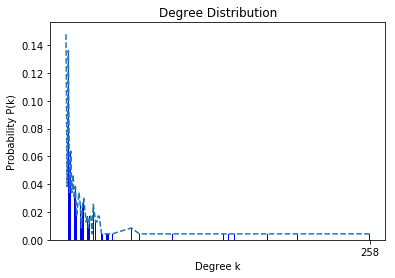

In [24]:
# Get list with degrees of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Dic with how much time each degree appeared
degreeCount = collections.Counter(degree_sequence)

# Separate dic into two separated tuples
deg, cnt = zip(*degreeCount.items())
cnt = list(cnt)


# Normalize cnt getting %
total_sum = sum(cnt)
for i in range(len(cnt)):
    cnt[i] = cnt[i]/total_sum
    
ax = plt.subplot()
plt.bar(deg, cnt, width=0.5, color='b', tick_label=[d for d in deg])
plt.plot(deg, cnt, linestyle='--')
plt.title("Degree Distribution")
plt.ylabel("Probability P(k)")
plt.xlabel("Degree k")

plt.xticks([258])

plt.show()

### Degree distribution (cummulative and non-commulative) in a log/log scale - Power Law

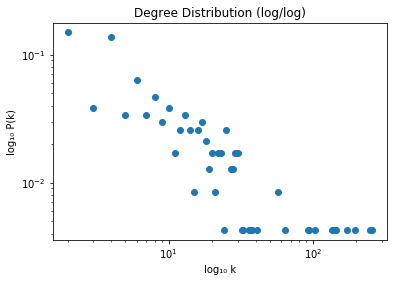

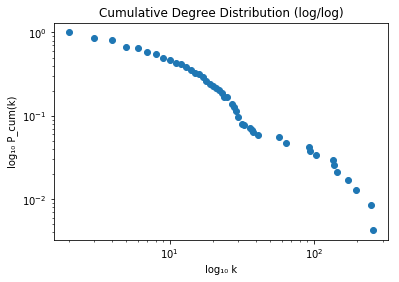

In [25]:
###################################################################################
#Plotting the power law in a log log scale ---- Non cummulative plot
###################################################################################

plt.figure()
plt.title("Degree Distribution (log/log)")
plt.ylabel("log₁₀ P(k)")
plt.xlabel("log₁₀ k")

plt.loglog(deg, cnt, 'o')


###################################################################################
#Plotting the power law in a log log scale ---- Cummulative plot
###################################################################################


# Build cummulative vector
cnt_cdf = []
for i in range(len(cnt)):
	cnt_cdf += [sum(cnt[0:i+1])]

plt.figure()

plt.title("Cumulative Degree Distribution (log/log)")
plt.ylabel("log₁₀ P_cum(k)")
plt.xlabel("log₁₀ k")
plt.loglog(deg, cnt_cdf, 'o')

plt.show()

#package python to compute the linear line is named power law https://pypi.org/project/powerlaw/

### Calculating gama

In [26]:
import powerlaw as pl

# Fits the parameters of the distribution to the data.
fit = pl.Fit(cnt_cdf)


print("Gama value of network: ", fit.alpha)

Gama value of network:  3.0429834900555677


Calculating best minimal value for power law fit
/opt/anaconda/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


### Plot the cumulative degree distribution within the optimal interval

None
0.3191489361702127


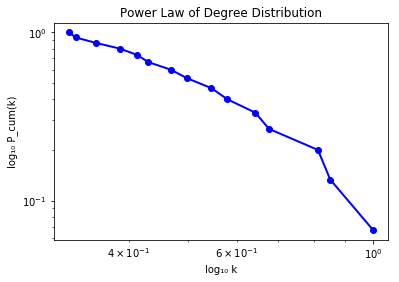

In [27]:
fit.plot_ccdf(color = 'b', marker='o', linewidth= 2)
plt.title("Power Law of Degree Distribution")
plt.ylabel("log₁₀ P_cum(k)")
plt.xlabel("log₁₀ k")
print(fit.xmax)
print(fit.xmin)


### Plot the CDD and the power law with the calculated gama within the optimal interval


/opt/anaconda/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0.5,0,'log₁₀ k')

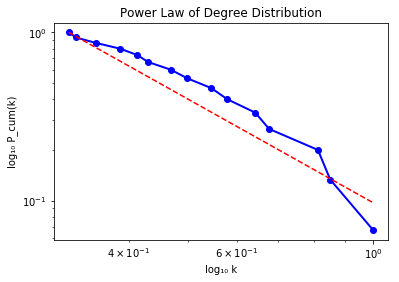

In [28]:
fig1 = fit.plot_ccdf(color = 'b', marker='o', linewidth= 2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig1)


plt.title("Power Law of Degree Distribution")
plt.ylabel("log₁₀ P_cum(k)")
plt.xlabel("log₁₀ k")

### Plotting the Power Law generated of the Average Degree Connectivity

We can see that the previous Average Degree Connectivity distribution plotted before is a Pareto Distribution. Below is the plot of its respective Power Law, as well as its signature.

Calculating best minimal value for power law fit
/opt/anaconda/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


3.0429834900555677


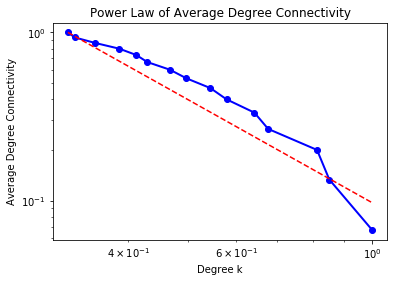

In [29]:
import powerlaw as pl

# Fits the parameters of the distribution to the data.
fit = pl.Fit(cnt_cdf)

fig1 = fit.plot_ccdf(color = 'b', marker='o', linewidth= 2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig1)
plt.title("Power Law of Average Degree Connectivity")
plt.xlabel("Degree k")
plt.ylabel("Average Degree Connectivity")


print(fit.alpha)